## Background 

Data ini merupakan data dari beberapa retail e-commerce terbesar dari Pakistan. Terdapat setengah juta transaksi dari Juli 2016 sampai Agustus 2018. Dari data ini diharapkan memiliki banyak insight untuk perkembangan bisnis ecommerce.

## Problems

Data analis ingin mengetahui customer behavior dari data yang disajikan, dengan mencari tahu hubungan dari data-data yang tersedia. Informasi ini akan membantu perusahaan untuk melakukan improve terhadap bisnis.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana customer behavior di Pakistan dengan pembelian melalui retai e-commerce?**

## Data

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [131]:
!pip install plotly
import plotly.express as px

In [132]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
df

d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [134]:
df.shape

(1048575, 26)

Dataset ini berisi informasi terkait status pembelian, jumlah pembelian, tanggal pembelian, dll. Ada 25 kolom di dalam dataset ini, yaitu:  

* item_id: Unique ID untuk tiap item
* Status: Status pembelian
* created_at : Waktu pada saat membuat order
* sku: Deskripsi Item
* price: Harga untuk setiap item
* qty_ordered: Jumlah order
* grand_total: Total harga order
* increment_id : Tidak diketahui
* category_name_1: Nama kategori setiap item
* sales_commission_code: Kode untuk sales commission
* discount_amount : Jumlah Diskon
* payment_method: Jenis pembayaran
* Working Date: Tidak diketahui
* BI Status: Tidak diketahui
* MV: Tidak diketahui
* Year: Tahun dari created_at
* Month: Bulan dari created_at
* Customer Since: Tanggal Customer Login
* M-Y: Bulan dan Tahun dari created date
* FY: Tidak diketahui
* Customer ID: Unique ID customer
* Unnamed: 21-25: Kolom kosong

Berikut 5 baris teratas dan terbawah dari dataset ini.

In [135]:
pd.set_option('display.max_columns', 100)

In [136]:
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


In [137]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524

In [138]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


In [139]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11644/3657208298.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

Secara umum, kita bisa melihat bahwa:
* Pakistan Largest Ecommerce Dataset memiliki 26 kolom dan 1048575 baris
* Diduga bahwa kira-kira setengah data merupakan data kosong karena dilihat bahwa angka unique tertinggi pada setiap kolom sebesar 584524.
* Terdapat 4 kolom yang tidak mempunyai data sama sekali.
* Tipe data dari Item ID, created_at, qty_ordered, Customer Since, Year, Customer ID merupakan float dan tidak cocok untuk peruntukan data nya, maka dari itu harus diubah terlebih dahulu.
* Kolom yang tidak diketahui akan di drop dari data frame
* Kolom grand_total dan discount_amount memiliki nilai minimum minus. Hal ini mencurigakan karena nilai total belanja dan discount seharusnya tidak boleh minus, maka harus dilakukan treatment terhadap data tersebut.


### Missing Value

In [140]:
# Total missing value
df.isna().sum()

item_id                  464051 
status                   464066 
created_at               464051 
sku                      464071 
price                    464051 
qty_ordered              464051 
grand_total              464051 
increment_id             464051 
category_name_1          464215 
sales_commission_code    601226 
discount_amount          464051 
payment_method           464051 
Working Date             464051 
BI Status                464051 
 MV                      464051 
Year                     464051 
Month                    464051 
Customer Since           464062 
M-Y                      464051 
FY                       464051 
Customer ID              464062 
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [141]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

item_id                  44.255394 
status                   44.256825 
created_at               44.255394 
sku                      44.257302 
price                    44.255394 
qty_ordered              44.255394 
grand_total              44.255394 
increment_id             44.255394 
category_name_1          44.271034 
sales_commission_code    57.337434 
discount_amount          44.255394 
payment_method           44.255394 
Working Date             44.255394 
BI Status                44.255394 
 MV                      44.255394 
Year                     44.255394 
Month                    44.255394 
Customer Since           44.256443 
M-Y                      44.255394 
FY                       44.255394 
Customer ID              44.256443 
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

Dapat kita lihat bahwa sebagian besar persen missing value yaitu 44% hal ini dapat disebabkan ada baris dengan semua nilai Null, dan terbukti bahwa ada 5 kolom yang semua nya kosong maka akan langsung di drop


Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Ini dilakukan dengan alasan kolom tidak diketahui, kolom dan baris semua nya berisi Null, atau kolom yang memiliki nilai Null yang tinggi dan tidak akan ada hubungannya dengan analisis yang akan dilakukan
* Kedua, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Langkah pertama yaitu menghapus semua kolom dan baris yang semua nya Null

In [142]:
# Delete All Columns that have no data
df.dropna(axis=1, how='all', inplace = True)

# Delete All Rows that have no data
df.dropna(axis=0, how='all', inplace = True)

In [143]:
# Check missing value
df.isna().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Working Date             0     
BI Status                0     
 MV                      0     
Year                     0     
Month                    0     
Customer Since           11    
M-Y                      0     
FY                       0     
Customer ID              11    
dtype: int64

In [144]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

item_id                  0.000000 
status                   0.002566 
created_at               0.000000 
sku                      0.003422 
price                    0.000000 
qty_ordered              0.000000 
grand_total              0.000000 
increment_id             0.000000 
category_name_1          0.028057 
sales_commission_code    23.467813
discount_amount          0.000000 
payment_method           0.000000 
Working Date             0.000000 
BI Status                0.000000 
 MV                      0.000000 
Year                     0.000000 
Month                    0.000000 
Customer Since           0.001882 
M-Y                      0.000000 
FY                       0.000000 
Customer ID              0.001882 
dtype: float64

Dapat dilihat bahwa jumlah Null pada data frame menurun drastis, hanya kolom status, sku, category_name_1, sales_commission_code, Customer Since, dan Customer ID yang masih memiliki nilai Null. Kolom sales_commission_code akan dihapus karena memiliki nilai Null tertinggi (23.46%) dan tidak akan digunakan untuk analisis kedepannya (karena analisis berfokus kepada customer bukan pegawai sales).

In [145]:
# drop column sales_commission_code because there is 137175 empty rows and this columns seems have no relation with another columns

df.drop(columns= 'sales_commission_code', inplace=True)

In [146]:
# Check missing value
df.isna().sum()

item_id            0  
status             15 
created_at         0  
sku                20 
price              0  
qty_ordered        0  
grand_total        0  
increment_id       0  
category_name_1    164
discount_amount    0  
payment_method     0  
Working Date       0  
BI Status          0  
 MV                0  
Year               0  
Month              0  
Customer Since     11 
M-Y                0  
FY                 0  
Customer ID        11 
dtype: int64

Kolom status, sku, category_name_1, sales_commission_code, Customer Since, dan Customer ID yang masih memiliki nilai Null. Nilai Null dari kolom-kolom ini sangat kecil (dibawah 1%).

In [147]:
# untuk data status, karena merupakan jenis data kategorikal maka diganti degan modus dari kolom status yaitu completed

df['status']= df['status'].fillna(df['status'].mode()[0])

In [148]:
df.isna().sum()

item_id            0  
status             0  
created_at         0  
sku                20 
price              0  
qty_ordered        0  
grand_total        0  
increment_id       0  
category_name_1    164
discount_amount    0  
payment_method     0  
Working Date       0  
BI Status          0  
 MV                0  
Year               0  
Month              0  
Customer Since     11 
M-Y                0  
FY                 0  
Customer ID        11 
dtype: int64

In [149]:
# kolom yang terdapat NaN selanjutnya adalah kolom sku, kolom ini akan dihapus karena tidak berpengaruh terhadap analisis

df.drop(columns='sku', inplace=True)

In [150]:
# kolom yang terdapat NaN selanjutnya adalah kolom category_name_1
# karena terdapat kategori other maka NaN disini akan diisi oleh other
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion         92221 
Women's Fashion       59721 
Appliances            52413 
Superstore            43613 
Beauty & Grooming     41496 
Soghaat               34011 
Others                29218 
Home & Living         26504 
Entertainment         26326 
Health & Sports       17502 
Kids & Baby           16494 
Computing             15933 
\N                    7850  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

In [151]:
df['category_name_1']=df['category_name_1'].fillna('Others')

In [152]:
df.isna().sum()

item_id            0 
status             0 
created_at         0 
price              0 
qty_ordered        0 
grand_total        0 
increment_id       0 
category_name_1    0 
discount_amount    0 
payment_method     0 
Working Date       0 
BI Status          0 
 MV                0 
Year               0 
Month              0 
Customer Since     11
M-Y                0 
FY                 0 
Customer ID        11
dtype: int64

In [153]:
# baris customer since dan customer ID yang NaN kita drop karena hanya 11 baris atau sebesar 0.001882%
df.dropna(subset=['Customer Since','Customer ID'], inplace=True)

In [154]:
df.isna().sum()

item_id            0
status             0
created_at         0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
BI Status          0
 MV                0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

Kolom yang akan digunakan adalah item_id, status, created_at, price, qty_ordered, grand_total, category_name_1, discount_amount, payment_method, Year, Month, M-Y, Customer Since, Customer ID

Kolom yang tidak digunakan adalah increment_id, Working Date, BI Status, MV, FY, Customer ID 

In [155]:
df.drop(columns=['increment_id','Working Date','BI Status',' MV ','FY'], inplace=True)

In [156]:
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,Customer ID
0,211131.0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,7-2016,1.0
1,211133.0,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-7,7-2016,2.0
2,211134.0,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,7-2016,3.0
3,211135.0,complete,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-7,7-2016,4.0
4,211136.0,order_refunded,7/1/2016,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-7,7-2016,5.0


In [157]:
df.columns

Index(['item_id', 'status', 'created_at', 'price', 'qty_ordered',
       'grand_total', 'category_name_1', 'discount_amount', 'payment_method',
       'Year', 'Month', 'Customer Since', 'M-Y', 'Customer ID'],
      dtype='object')

### Pengecekan terhadap isi dari setiap kolom kategorikal

In [158]:
df['status'].value_counts()

complete          233700
canceled          201244
received          77289 
order_refunded    59524 
refund            8050  
cod               2859  
paid              1159  
closed            494   
payment_review    57    
pending           48    
processing        33    
holded            31    
fraud             10    
pending_paypal    7     
exchange          4     
\N                4     
Name: status, dtype: int64

In [159]:
# Terdapat unique value yang memiliki arti yang sama tetapi dengan penulisan yang berbeda
# Maka dari itu, dilakukan penyeragaman untuk unique value yang sama 
df['status'] = df['status'].replace(['order_refunded','closed','pending_paypal','holded'],['refund','complete','pending','pending'])

In [160]:
# Terdapat Nilai \N, nilai ini dianggap Null dan diganti dengan modus dari kolom status
df['status'] = df['status'].replace(r'\N', 'complete')

In [161]:
df['status'].value_counts()

complete          234198
canceled          201244
received          77289 
refund            67574 
cod               2859  
paid              1159  
pending           86    
payment_review    57    
processing        33    
fraud             10    
exchange          4     
Name: status, dtype: int64

In [162]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion         92219 
Women's Fashion       59720 
Appliances            52413 
Superstore            43613 
Beauty & Grooming     41494 
Soghaat               34011 
Others                29376 
Home & Living         26504 
Entertainment         26326 
Health & Sports       17502 
Kids & Baby           16494 
Computing             15933 
\N                    7850  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

In [163]:
df['category_name_1'] = df['category_name_1'].replace(r'\N', 'Others')

In [164]:
df['payment_method'].value_counts()

cod                  271955
Payaxis              97640 
Easypay              82896 
jazzwallet           35145 
easypay_voucher      31176 
bankalfalah          23065 
jazzvoucher          15633 
Easypay_MA           14027 
customercredit       7555  
apg                  1758  
ublcreditcard        882   
cashatdoorstep       732   
mcblite              723   
mygateway            669   
internetbanking      472   
productcredit        125   
marketingexpense     45    
financesettlement    15    
Name: payment_method, dtype: int64

In [165]:
# Penyeragaman unique value cashatdoorstep, karena sama dengan cod
df['payment_method'] = df['payment_method'].replace('cashatdoorstep','cod')
df['payment_method'].value_counts()

cod                  272687
Payaxis              97640 
Easypay              82896 
jazzwallet           35145 
easypay_voucher      31176 
bankalfalah          23065 
jazzvoucher          15633 
Easypay_MA           14027 
customercredit       7555  
apg                  1758  
ublcreditcard        882   
mcblite              723   
mygateway            669   
internetbanking      472   
productcredit        125   
marketingexpense     45    
financesettlement    15    
Name: payment_method, dtype: int64

### Ganti Tipe data

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584513 entries, 0 to 584523
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584513 non-null  float64
 1   status           584513 non-null  object 
 2   created_at       584513 non-null  object 
 3   price            584513 non-null  float64
 4   qty_ordered      584513 non-null  float64
 5   grand_total      584513 non-null  float64
 6   category_name_1  584513 non-null  object 
 7   discount_amount  584513 non-null  float64
 8   payment_method   584513 non-null  object 
 9   Year             584513 non-null  float64
 10  Month            584513 non-null  float64
 11  Customer Since   584513 non-null  object 
 12  M-Y              584513 non-null  object 
 13  Customer ID      584513 non-null  float64
dtypes: float64(8), object(6)
memory usage: 66.9+ MB


In [167]:
import datetime

In [168]:
df['item_id'] = df['item_id'].astype(int)
df['created_at'] = df['created_at'].astype("datetime64[ns]")
df['qty_ordered'] = df['qty_ordered'].astype(int)
df['Customer Since'] = df['Customer Since'].astype("period[M]")
df['Year'] = df['Year'].astype(int)
df['Customer ID'] = df['Customer ID'].astype(int)
df['Month'] = df['Month'].astype(int)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584513 entries, 0 to 584523
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584513 non-null  int32         
 1   status           584513 non-null  object        
 2   created_at       584513 non-null  datetime64[ns]
 3   price            584513 non-null  float64       
 4   qty_ordered      584513 non-null  int32         
 5   grand_total      584513 non-null  float64       
 6   category_name_1  584513 non-null  object        
 7   discount_amount  584513 non-null  float64       
 8   payment_method   584513 non-null  object        
 9   Year             584513 non-null  int32         
 10  Month            584513 non-null  int32         
 11  Customer Since   584513 non-null  period[M]     
 12  M-Y              584513 non-null  object        
 13  Customer ID      584513 non-null  int32         
dtypes: datetime64[ns](1)

In [170]:
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,Customer ID
0,211131,complete,2016-07-01,1950.0,1,1950.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,1
1,211133,canceled,2016-07-01,240.0,1,240.0,Beauty & Grooming,0.0,cod,2016,7,2016-07,7-2016,2
2,211134,canceled,2016-07-01,2450.0,1,2450.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,3
3,211135,complete,2016-07-01,360.0,1,60.0,Beauty & Grooming,300.0,cod,2016,7,2016-07,7-2016,4
4,211136,refund,2016-07-01,555.0,2,1110.0,Soghaat,0.0,cod,2016,7,2016-07,7-2016,5


## Analisis

### Analisis Deskriptif

In [171]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584513.000000,5.845130e+05,584513.000000,5.845130e+05,584513.000000,584513.000000,584513.000000,584513.000000
mean,565663.128495,6.348821e+03,1.296375,8.530676e+03,499.502175,2017.044097,7.167746,45790.511965
std,200120.929873,1.494940e+04,3.996094,6.132138e+04,1506.955668,0.707349,3.486270,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,394997.000000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568417.000000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739102.000000,4.070000e+03,1.000000,6.999000e+03,160.520000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


,status,category_name_1,payment_method,M-Y
count,584513,584513,584513,584513
unique,11,15,17,26
top,complete,Mobiles & Tablets,cod,11-2017
freq,234198,115710,272687,83928


- Dari Analisis kolom numerikal diatas dapat dilihat bahwa terdapat nilai grand total dan discount amount yang bernilai minus. Grand Total merupakan hasil perkalian antara price dengan quantity order dikurang dengan discount amount sehingga seharusnya nilai grand total tidak minus. Begitu juga dengan discount amount, seharusnya nilai discount amount tidak minus. Maka, dilakukan treatment terhadap nilai minus yang terdapat pada kolom grand total dan juga discount amount.
- Sedangkan dari kolom kategorikal dapat dilihat bahwa status pembelian terbanyak adalah complete, category yang paling banyak dibeli adalah Mobiles & Tablets, payment method yang paling sering customer pilih adalah cod.

In [172]:
# Nilai discount diubah menjadi absolute untuk mengubah nilai negative pada discount amount
df['discount_amount'] = df['discount_amount'].apply(abs)

In [173]:
# Untuk nilai grand total yang minus dilakukan perumusan ulang karena dikhawatirkan terinput rumus yang salah
df['grand_total'].loc[df['grand_total']<0.0] = (df['qty_ordered'].loc[df['grand_total']<0.0] * df['price'].loc[df['grand_total']<0.0] - df['discount_amount'].loc[df['grand_total']<0.0])

d:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
# Masih terdapat nilai minus pada nilai grand total, hal ini dapat dikarenakan nilai discount yang lebih besar dibandingkan dengan harga
df['grand_total'].loc[df['grand_total']<0.0]

434599   -390.5 
434600   -889.5 
434601   -1190.5
434603   -1190.5
434604   -1410.5
434605   -490.5 
571259   -587.6 
571260   -587.6 
571261   -587.6 
571262   -587.6 
571263   -587.6 
571264   -587.6 
571265   -562.6 
571266   -467.6 
571267   -435.6 
571269   -287.6 
571270   -192.6 
571271   -432.6 
571272   -162.6 
571273   -220.6 
571274   -137.6 
Name: grand_total, dtype: float64

In [175]:
# Maka, grand total yang bernilai minus diubah menjadi nilai minimum yaitu 0
df['grand_total'].loc[df['grand_total']<0.0] = 0

In [176]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584513.000000,5.845130e+05,584513.000000,5.845130e+05,584513.000000,584513.000000,584513.000000,584513.000000
mean,565663.128495,6.348821e+03,1.296375,8.531049e+03,499.504240,2017.044097,7.167746,45790.511965
std,200120.929873,1.494940e+04,3.996094,6.132139e+04,1506.954983,0.707349,3.486270,34414.962389
min,211131.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2016.000000,1.000000,1.000000
25%,394997.000000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568417.000000,8.990000e+02,1.000000,1.960700e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739102.000000,4.070000e+03,1.000000,6.999000e+03,160.539900,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


,status,category_name_1,payment_method,M-Y
count,584513,584513,584513,584513
unique,11,15,17,26
top,complete,Mobiles & Tablets,cod,11-2017
freq,234198,115710,272687,83928


Setelah dilakukan analisis deskriptif ulang, dapat dilihat bahwa tidak ada nilai negatif lagi pada kolom numerikal.

### Analisis 1

In [177]:
# Analisa pertama, adalah mencari tahu grand total transaksi per bulan setiap tahun
df_line2 = df.groupby(['Year', 'Month'])['grand_total'].agg('sum').to_frame().sort_index(ascending=True).reset_index()
df_line2.head()

# df_line2 = df.groupby(['Year', 'Month', 'status'])['grand_total'].agg('sum').to_frame().sort_index(ascending=True).reset_index()
# df_line2[df_line2['status']=='complete']

,Year,Month,grand_total
0,2016,7,4.329195e+07
1,2016,8,5.623573e+07
2,2016,9,9.030933e+07
3,2016,10,9.806605e+07
4,2016,11,2.683045e+08


In [178]:
df_line2.describe()

,Year,Month,grand_total
count,26.000000,26.000000,2.600000e+01
mean,2017.076923,6.576923,1.917888e+08
std,0.744208,3.396152,1.655149e+08
min,2016.000000,1.000000,4.329195e+07
25%,2017.000000,4.000000,8.918907e+07
50%,2017.000000,7.000000,1.268636e+08
75%,2018.000000,9.000000,2.610487e+08
max,2018.000000,12.000000,7.996114e+08


In [179]:
fig = px.line(df_line2, x='Month', y='grand_total', color='Year', title='Jumlah Total Transaksi Per Bulan Tiap Tahun')
fig.show()

Dari Line plot diatas dapat dilihat bahwa:
- Transaksi tertinggi pada tahun 2017 pada bulan 11 (sekitar 799 Juta)
- Transaksi terendah pada tahun 2016 pada bulan 7 (sekitar 43 Juta)

Kita dapat mencari tahu apakah discount merupakan salah satu penyebab tingginya total transaksi pada bulan 11 di tahun 2017.

Berikut data 5 bulan dengan rata-rata discount amount paling tinggi.

In [180]:
df.groupby(['M-Y'])['discount_amount'].agg('mean').to_frame().sort_values(by='discount_amount', ascending=False).sort_values(by='discount_amount', ascending=False).head(5)

,discount_amount
M-Y,
2-2018,1702.101351
5-2018,1162.506592
11-2017,981.598112
5-2017,671.569451
3-2018,633.759975


Dapat disimpulkan bahwa, discount amount bukan merupakan alasan tinggi nya transaksi pada bulan 11 di tahun 2017.

### Analisis 2

In [181]:
# Setelah mencari tahu total keseluruhan traksaksi, 
# data analis ingin mencari jumlah item transaksi (per bulan) pada setiap tahun 
df_line1 = df.groupby(['Year', 'Month'])['item_id'].agg('count').to_frame().sort_index(ascending=True).reset_index()
df_line1.head()

,Year,Month,item_id
0,2016,7,8837
1,2016,8,11535
2,2016,9,15433
3,2016,10,13124
4,2016,11,71528


In [182]:
fig = px.line(df_line1, x='Month', y='item_id', color='Year', title='Jumlah Item Transaksi Per Bulan Tiap Tahun')
fig.show()

Lineplot diatas menjelaskan bahwa:
- Item (barang) paling banyak terjual pada bulan 11 baik di tahun 2017. Hal ini sesuai dengan grafik sebelumnya yang menyatakan bahwa total transaksi paling banyak yaitu pada bulan 11 di tahun 2017

### Analisis 3

In [183]:
#  Analisis diatas merupakan analisis transaksi secara keseluruhan. Transaksi dibagi lagi dengan beberapa status.
#  Maka dari itu, data analis ingin mencari tahu jumlah transaksi berdasarkan status.
df_gb = df.groupby(['status'])['grand_total'].agg('sum').to_frame().sort_values(by='grand_total', ascending=False).reset_index()
df_gb

,status,grand_total
0,canceled,2.905577e+09
1,complete,1.175499e+09
2,refund,4.432754e+08
3,received,4.355490e+08
4,cod,1.237422e+07
5,paid,8.810756e+06
6,pending,2.438122e+06
7,processing,2.117684e+06
8,fraud,6.269440e+05
9,payment_review,2.346497e+05


In [184]:
fig = px.bar(
    df_gb,
    x='status',
    y='grand_total',
    title='Total transaksi pada tiap status')

fig.show()

### Analisis 4

In [185]:
# Sebagai data tambahan, data analis mencari 10 kategori item paling banyak dibeli sampai selesai oleh customer (status pembelian complete)
df_ct=pd.crosstab(df['category_name_1'],df['status'])[['complete']]
df_ct = df_ct.sort_values('complete',ascending=False).head(10).reset_index()
df_ct

status,category_name_1,complete
0,Mobiles & Tablets,41722
1,Men's Fashion,40357
2,Women's Fashion,23805
3,Appliances,20801
4,Beauty & Grooming,20792
5,Soghaat,19808
6,Superstore,16705
7,Home & Living,11168
8,Entertainment,9335
9,Health & Sports,8064


In [186]:
fig = px.bar(
    df_ct,
    x='category_name_1',
    y='complete',
    title='Top 10 kategori penjualan dengan status complete')

fig.show()

Dari barplot diatas dapat dilihat bahwa kategori yang paling banyak dibeli sampai selesai oleh customer adalah kategori Mobile & Tablets dan kategori yang paling rendah dibeli sampai selesai adalah Health & Sports.

Uji statistika lanjutan yang digunakan pada hubungan antara category name dan status adalah Chi-Squared Test. Test ini digunakan untuk menguji hipotesis apakah dua/lebih variabel kategorikal independen atau dependen.

In [187]:
from scipy.stats import chi2_contingency
df_ct=pd.crosstab(df['category_name_1'],df['status'])
df_ct = df_ct.sort_values('complete',ascending=False).head(10)
df_ct

status,canceled,cod,complete,exchange,fraud,paid,payment_review,pending,processing,received,refund
category_name_1,,,,,,,,,,,
Mobiles & Tablets,53715,163,41722,1,6,80,1,29,6,8332,11655
Men's Fashion,22024,600,40357,1,0,105,6,8,20,12191,16907
Women's Fashion,15961,495,23805,1,0,124,0,5,3,10059,9267
Appliances,21628,109,20801,0,0,43,6,9,1,4587,5229
Beauty & Grooming,9686,329,20792,0,0,114,2,3,1,6257,4310
Soghaat,7593,111,19808,0,0,71,9,4,0,4159,2256
Superstore,13926,171,16705,0,0,371,28,1,0,9947,2464
Home & Living,7199,394,11168,0,1,78,0,4,1,4601,3058
Entertainment,12579,21,9335,0,2,20,1,13,0,2119,2236


In [188]:
# Kolom status dibagi 2 yaitu Complete dan sisanya Non Complete
df_ct['non_complete'] = df_ct['canceled'] + df_ct['cod'] + df_ct['exchange'] + df_ct['fraud'] + df_ct['paid']+ df_ct['payment_review']+ df_ct['pending']+ df_ct['processing']+ df_ct['received']+ df_ct['refund']
df_ct.drop(columns=['canceled','cod','exchange','fraud','paid','payment_review','pending','processing','received','refund'], inplace=True)

In [189]:
df_ct

status,complete,non_complete
category_name_1,,
Mobiles & Tablets,41722,73988
Men's Fashion,40357,51862
Women's Fashion,23805,35915
Appliances,20801,31612
Beauty & Grooming,20792,20702
Soghaat,19808,14203
Superstore,16705,26908
Home & Living,11168,15336
Entertainment,9335,16991


In [190]:
stat, pvalue, dof, expected = chi2_contingency(df_ct)
pvalue

0.0

In [191]:
if pvalue > 0.05:
    print(f""" pvalue = {pvalue}. pvalue > 0.05 (alpha). Failed to reject H0
    kita tidak punya cukup bukti untuk mengatakan bahwa category_name_1 dan status complete adalah dependent.
    """)
else:
    print(f""" pvalue = {pvalue}. pvalue <= 0.05 (alpha). Reject H0
    kita punya cukup bukti untuk mengatakan bahwa category_name_1 dan status complete adalah dependent.
    """)

 pvalue = 0.0. pvalue <= 0.05 (alpha). Reject H0
    kita punya cukup bukti untuk mengatakan bahwa category_name_1 dan status complete adalah dependent.
    


### Analisis 5

In [192]:
# Sepeti analisis 5, kali ini data analis ingin mencari tahu categori mana yang paling sering di cancel
df_ct1=pd.crosstab(df['category_name_1'],df['status'])[['canceled']]
df_ct1 = df_ct1.sort_values('canceled',ascending=False).head(10).reset_index()
df_ct1

status,category_name_1,canceled
0,Mobiles & Tablets,53715
1,Men's Fashion,22024
2,Others,21637
3,Appliances,21628
4,Women's Fashion,15961
5,Superstore,13926
6,Entertainment,12579
7,Beauty & Grooming,9686
8,Soghaat,7593
9,Home & Living,7199


In [193]:
fig = px.bar(
    df_ct1,
    x='category_name_1',
    y='canceled',
    title='Top 10 kategori penjualan dengan status cancel')

fig.show()

Walaupun category Mobiles & Tablets merupakan kategori yang paling sering di dibeli sampai complete dari data sebelumnya, ternyata category ini juga paling banyak di cancel pembeliannya oleh customer.

### Analisis 6

In [194]:
# Data analis ingin mencari tahu apakah ada hubungan cancel-nya pembelian dengan rata-rata discount amount
# Maka, dicari korelasi antara status dan discount amount
df_2 = df.groupby('status').mean()[['discount_amount']].sort_values('discount_amount',ascending=False).reset_index()
df_2

,status,discount_amount
0,pending,1476.174186
1,canceled,629.689906
2,payment_review,578.215789
3,complete,506.918152
4,received,408.972736
5,paid,249.171380
6,refund,213.586337
7,processing,30.755455
8,cod,12.066604
9,exchange,0.000000


''

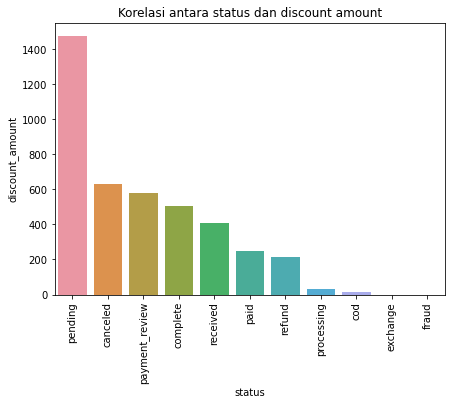

In [195]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_2, x='status', y='discount_amount')
plt.title('Korelasi antara status dan discount amount')
plt.xticks(rotation=90)
;

Barplot diatas menjelaskan korelasi antara rata-rata discount terhadap status pembayaran. Dapat dilihat bahwa dengan rata-rata discount yang tinggi tetapi diikuti dengan status pembayaran pending. Padahal, diharapkan dengan ada nya discount status pembelian dapat complete (sampai selesai)

Uji statistika lanjutan yang digunakan pada hubungan antara status dan discount amount adalah Kruskal Walis. Kruskal Walis untuk menguji hipotesis rata-rata lebih dari dua populasi.

In [196]:
# Pertama, dilakukan uji normalitas untuk mengetahui apakah data numerikal terdistribusi normal atau tidak
from scipy.stats import kstest

In [197]:
stat_ks, pvalue_ks = kstest(df['discount_amount'], 'norm')

if pvalue_ks > 0.05:
    print(f'p-value={pvalue_ks:.10f}, artinya kita mengasumsikan data terdistribusi normal')
else:
    print(f'p-value={pvalue_ks:.10f}, artinya kita TIDAK mengasumsikan data terdistribusi normal')

p-value=0.0000000000, artinya kita TIDAK mengasumsikan data terdistribusi normal


In [198]:
# Data numerikal yaitu discount amount tidak terdistribusi normal, maka dilakukan uji Kruskal Walis.
df_2 = df.groupby('status').mean()[['discount_amount']].sort_values('discount_amount',ascending=False).reset_index()
df_2

,status,discount_amount
0,pending,1476.174186
1,canceled,629.689906
2,payment_review,578.215789
3,complete,506.918152
4,received,408.972736
5,paid,249.171380
6,refund,213.586337
7,processing,30.755455
8,cod,12.066604
9,exchange,0.000000


In [199]:
df_melted = pd.melt(df, id_vars=['status'], value_vars=['discount_amount'], value_name='value_numbers')
df_melted.drop(columns='variable', inplace=True)

In [200]:
df_melted.head()

,status,value_numbers
0,complete,0.0
1,canceled,0.0
2,canceled,0.0
3,complete,300.0
4,refund,0.0


In [201]:
from scipy.stats import kruskal

In [202]:
stat, pvalue = kruskal(
    df_melted[df_melted['status']=='pending']['value_numbers'],
    df_melted[df_melted['status']=='canceled']['value_numbers'],
    df_melted[df_melted['status']=='payment_review']['value_numbers'],
    df_melted[df_melted['status']=='complete']['value_numbers'],
    df_melted[df_melted['status']=='received']['value_numbers'],
    df_melted[df_melted['status']=='paid']['value_numbers'],
    df_melted[df_melted['status']=='refund']['value_numbers'],
    df_melted[df_melted['status']=='processing']['value_numbers'],
    df_melted[df_melted['status']=='cod']['value_numbers'],
    df_melted[df_melted['status']=='exchange']['value_numbers'],
    df_melted[df_melted['status']=='fraud']['value_numbers'],
)
pvalue

0.0

In [203]:
if pvalue > 0.05:
    print(f""" pvalue = {pvalue}. pvalue > 0.05 (alpha). Failed to reject H0
    kita tidak punya cukup bukti untuk mengatakan bahwa minimal salah satu status ada yg meannnya berbeda.
    """)
else:
    print(f""" pvalue = {pvalue}. pvalue <= 0.05 (alpha). Reject H0
    kita punya cukup bukti untuk mengatakan bahwa minimal salah satu status ada yg meannya berbeda.
    """)

 pvalue = 0.0. pvalue <= 0.05 (alpha). Reject H0
    kita punya cukup bukti untuk mengatakan bahwa minimal salah satu status ada yg meannya berbeda.
    


### Analisis 7

In [204]:
# Lalu, dicari tahu lagi apakah ada hubungannya status cancel dengan payment method
# Maka, data analis mencari korelasi antara payment method dan status
df_ct2 = pd.crosstab(df['payment_method'],df['status']).reset_index()
df_ct2

status,payment_method,canceled,cod,complete,exchange,fraud,paid,payment_review,pending,processing,received,refund
0,Easypay,52036,0,19230,0,0,241,0,2,0,8036,3351
1,Easypay_MA,9209,0,3116,0,0,35,0,0,0,1208,459
2,Payaxis,61267,0,22880,0,9,398,0,8,4,8708,4366
3,apg,1361,0,27,0,0,20,0,0,0,305,45
4,bankalfalah,16184,0,592,0,0,183,57,15,8,5166,860
5,cod,21758,2859,149091,4,0,0,0,13,20,44560,54382
6,customercredit,47,0,4175,0,0,98,0,3,0,1740,1492
7,easypay_voucher,12189,0,16068,0,0,18,0,33,0,2147,721
8,financesettlement,1,0,9,0,0,0,0,0,0,0,5
9,internetbanking,286,0,160,0,0,0,0,0,0,0,26


In [205]:
plt.figure(figsize=(20,5))
df_ct2_melted = pd.melt(df_ct2, id_vars=['payment_method'], value_vars=['complete','canceled','refund'], var_name='status',value_name='value_numbers')

fig = px.bar(
    df_ct2_melted,
    x='payment_method',
    y='value_numbers', 
    color='status',
    barmode='group',
    title='Korelasi antara Payment Method dan Status')

fig.show()

<Figure size 1440x360 with 0 Axes>

Dari barplot diatas, disimpulkan bahwa:
- untuk status pembelian compelete (sampai selesai) paling tinggi yaitu dengan motode pembayaran cod (cash on delivery)
- untuk status pembelian canceled (yang dibatalkan) paling tinggi yaitu dengan metode pembayaran Payaxis
- untuk status pembelian refund (meminta penggembalian uang) paling tinggi yaitu motode pembayaran cod (cash on delivery)

### Analisis 8

In [206]:
# Data analis ingin mengetahui category order yang dibeli per bulan sebagai salah satu analisis customer behavior lainnya
df_10 = df.groupby('Month')['category_name_1'].value_counts()
df_10

Month  category_name_1   
1      Mobiles & Tablets     5739
       Men's Fashion         3617
       Women's Fashion       2973
       Soghaat               2367
       Beauty & Grooming     2168
                             ... 
12     Computing             767 
       Entertainment         623 
       Others                491 
       School & Education    235 
       Books                 114 
Name: category_name_1, Length: 180, dtype: int64

In [207]:
df_10 = df_10.groupby('Month').head(3).to_frame().rename(columns={'category_name_1': 'count'}).reset_index()

In [208]:
fig = px.bar(df_10, x='Month', y='count',
             hover_data=['category_name_1'], color='category_name_1', height=400, title='Category Order Per Bulan')
fig.show()


Dari data diatas, kita dapat melihat Top 3 kategori yang paling sering dibeli tiap bulannya. Mobiles & Tablets dan Men's Fashion adalah kategori yang paling konsisten penjualannya setiap bulan.

### Analisis 9

In [209]:
# Data Analis juga melakukan cohort analisis untuk mencari customer behavior yang lain.
# Analisis ini bertujuan untuk melihat engagement dari user kita dari waktu-ke-waktu.
df['cohort_month'] = df.groupby('Customer ID')['created_at'].transform('min').dt.to_period('M')
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,Customer ID,cohort_month
0,211131,complete,2016-07-01,1950.0,1,1950.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,1,2016-07
1,211133,canceled,2016-07-01,240.0,1,240.0,Beauty & Grooming,0.0,cod,2016,7,2016-07,7-2016,2,2016-07
2,211134,canceled,2016-07-01,2450.0,1,2450.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,3,2016-07
3,211135,complete,2016-07-01,360.0,1,60.0,Beauty & Grooming,300.0,cod,2016,7,2016-07,7-2016,4,2016-07
4,211136,refund,2016-07-01,555.0,2,1110.0,Soghaat,0.0,cod,2016,7,2016-07,7-2016,5,2016-07


In [210]:
df['Customer ID'].value_counts()

85775     2524
163       2349
35        1877
33        1397
31025     1369
          ... 
52124     1   
52127     1   
52129     1   
52136     1   
115326    1   
Name: Customer ID, Length: 115326, dtype: int64

In [211]:
df['current_order_month'] = df['created_at'].dt.to_period('M')
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,Customer ID,cohort_month,current_order_month
0,211131,complete,2016-07-01,1950.0,1,1950.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,1,2016-07,2016-07
1,211133,canceled,2016-07-01,240.0,1,240.0,Beauty & Grooming,0.0,cod,2016,7,2016-07,7-2016,2,2016-07,2016-07
2,211134,canceled,2016-07-01,2450.0,1,2450.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,3,2016-07,2016-07
3,211135,complete,2016-07-01,360.0,1,60.0,Beauty & Grooming,300.0,cod,2016,7,2016-07,7-2016,4,2016-07,2016-07
4,211136,refund,2016-07-01,555.0,2,1110.0,Soghaat,0.0,cod,2016,7,2016-07,7-2016,5,2016-07,2016-07


In [212]:
df_cohort = df.groupby(['cohort_month', 'current_order_month']).agg(n_customers=('Customer ID', 'nunique')).reset_index()
df_cohort.head()

,cohort_month,current_order_month,n_customers
0,2016-07,2016-07,2406
1,2016-07,2016-08,468
2,2016-07,2016-09,391
3,2016-07,2016-10,325
4,2016-07,2016-11,472


In [213]:
from operator import attrgetter

In [214]:
df_cohort['period_number'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']).apply(attrgetter('n'))
df_cohort

,cohort_month,current_order_month,n_customers,period_number
0,2016-07,2016-07,2406,0
1,2016-07,2016-08,468,1
2,2016-07,2016-09,391,2
3,2016-07,2016-10,325,3
4,2016-07,2016-11,472,4
...,...,...,...,...
346,2018-06,2018-07,164,1
347,2018-06,2018-08,63,2
348,2018-07,2018-07,1768,0
349,2018-07,2018-08,118,1


In [215]:
cohort_retention_pivot = df_cohort.pivot_table(index='cohort_month', columns='period_number', values='n_customers')
cohort_retention_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,2406.0,468.0,391.0,325.0,472.0,277.0,250.0,212.0,244.0,251.0,244.0,179.0,171.0,156.0,73.0,109.0,213.0,93.0,71.0,57.0,88.0,60.0,90.0,69.0,51.0,55.0
2016-08,3097.0,396.0,274.0,422.0,218.0,188.0,153.0,169.0,158.0,175.0,129.0,126.0,124.0,52.0,76.0,181.0,69.0,61.0,54.0,74.0,54.0,66.0,46.0,35.0,43.0,NaN
2016-09,4773.0,660.0,1138.0,343.0,290.0,228.0,377.0,347.0,492.0,245.0,261.0,271.0,99.0,176.0,470.0,132.0,118.0,116.0,163.0,94.0,175.0,84.0,72.0,100.0,NaN,NaN
2016-10,2593.0,520.0,195.0,170.0,132.0,172.0,151.0,177.0,83.0,89.0,91.0,42.0,61.0,176.0,58.0,40.0,38.0,52.0,42.0,56.0,34.0,23.0,28.0,NaN,NaN,NaN
2016-11,14697.0,1232.0,635.0,537.0,645.0,622.0,924.0,497.0,540.0,532.0,172.0,328.0,1179.0,293.0,198.0,227.0,320.0,181.0,308.0,157.0,117.0,147.0,NaN,NaN,NaN,NaN
2016-12,2548.0,254.0,150.0,149.0,101.0,113.0,57.0,67.0,63.0,32.0,42.0,131.0,29.0,41.0,38.0,44.0,23.0,33.0,27.0,14.0,22.0,NaN,NaN,NaN,NaN,NaN
2017-01,2410.0,244.0,136.0,132.0,125.0,85.0,71.0,70.0,45.0,50.0,121.0,45.0,40.0,30.0,36.0,28.0,46.0,24.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,2843.0,281.0,145.0,125.0,85.0,87.0,76.0,36.0,41.0,111.0,40.0,38.0,43.0,58.0,36.0,35.0,30.0,24.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,4526.0,394.0,277.0,148.0,155.0,155.0,55.0,85.0,220.0,65.0,47.0,58.0,83.0,42.0,78.0,48.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
cohort_size = cohort_retention_pivot.iloc[ : , 0]
cohort_size

cohort_month
2016-07    2406.0 
2016-08    3097.0 
2016-09    4773.0 
2016-10    2593.0 
2016-11    14697.0
2016-12    2548.0 
2017-01    2410.0 
2017-02    2843.0 
2017-03    4526.0 
2017-04    3167.0 
2017-05    6487.0 
2017-06    3242.0 
2017-07    3395.0 
2017-08    4181.0 
2017-09    1546.0 
2017-10    3375.0 
2017-11    16719.0
2017-12    2397.0 
2018-01    2002.0 
2018-02    5878.0 
2018-03    11329.0
2018-04    2486.0 
2018-05    3998.0 
2018-06    1933.0 
2018-07    1768.0 
2018-08    1530.0 
Freq: M, Name: 0, dtype: float64

In [217]:
retention_in_percentage = cohort_retention_pivot.div(cohort_size, axis=0) * 100
retention_in_percentage

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,100.0,19.451372,16.251039,13.507897,19.617623,11.512884,10.390690,8.811305,10.141313,10.432253,10.141313,7.439734,7.107232,6.483791,3.034081,4.530341,8.852868,3.865337,2.950956,2.369077,3.657523,2.493766,3.740648,2.867830,2.119701,2.285952
2016-08,100.0,12.786568,8.847272,13.626090,7.039070,6.070391,4.940265,5.456894,5.101711,5.650630,4.165321,4.068453,4.003875,1.679044,2.453988,5.844366,2.227963,1.969648,1.743623,2.389409,1.743623,2.131095,1.485308,1.130126,1.388440,NaN
2016-09,100.0,13.827781,23.842447,7.186256,6.075843,4.776870,7.898596,7.270061,10.307982,5.133040,5.468259,5.677771,2.074167,3.687408,9.847056,2.765556,2.472240,2.430337,3.415043,1.969411,3.666457,1.759899,1.508485,2.095118,NaN,NaN
2016-10,100.0,20.053992,7.520247,6.556113,5.090629,6.633243,5.823371,6.826070,3.200926,3.432318,3.509449,1.619745,2.352487,6.787505,2.236791,1.542615,1.465484,2.005399,1.619745,2.159661,1.311223,0.887003,1.079830,NaN,NaN,NaN
2016-11,100.0,8.382663,4.320610,3.653807,4.388651,4.232156,6.286997,3.381643,3.674219,3.619786,1.170307,2.231748,8.022045,1.993604,1.347214,1.544533,2.177315,1.231544,2.095666,1.068245,0.796081,1.000204,NaN,NaN,NaN,NaN
2016-12,100.0,9.968603,5.886970,5.847724,3.963893,4.434851,2.237049,2.629513,2.472527,1.255887,1.648352,5.141287,1.138148,1.609105,1.491366,1.726845,0.902669,1.295133,1.059655,0.549451,0.863422,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,10.124481,5.643154,5.477178,5.186722,3.526971,2.946058,2.904564,1.867220,2.074689,5.020747,1.867220,1.659751,1.244813,1.493776,1.161826,1.908714,0.995851,0.705394,0.871369,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,100.0,9.883925,5.100246,4.396764,2.989800,3.060148,2.673233,1.266268,1.442139,3.904326,1.406964,1.336616,1.512487,2.040098,1.266268,1.231094,1.055223,0.844179,0.633134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,100.0,8.705259,6.120194,3.269996,3.424658,3.424658,1.215201,1.878038,4.860804,1.436147,1.038445,1.281485,1.833849,0.927972,1.723376,1.060539,0.883783,1.303579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


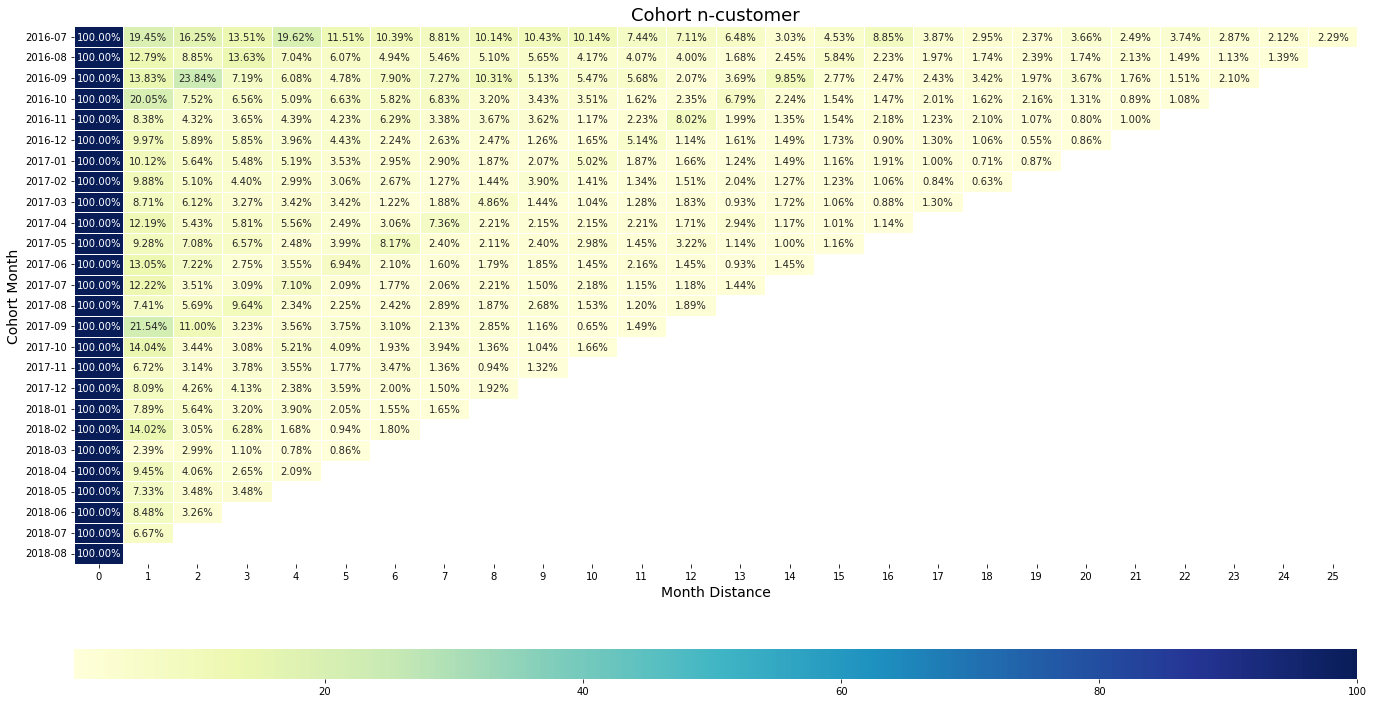

In [218]:
# mengatur ukuran grrid/axes
grid_kws = {"height_ratios":(0.9, 0.05), "hspace": 0.3}

# membuat figure dan axes
fig, (ax, cbar_ax) = plt.subplots(nrows=2, figsize=(23,12), gridspec_kw=grid_kws)

# axes baris atas diisi dengan heatmap
ax = sns.heatmap(
                data=retention_in_percentage,
                ax=ax,                                      # meletakkan heatmap
                cbar_ax=cbar_ax,                            # meletakkan color bar    
                annot=True,                                 # memberi label nilai    
                fmt= '.2f',                                 # format penulisan untuk annot        
                cbar_kws={'orientation':'horizontal'},      # mengubah orientasi color bar
                cmap='YlGnBu',                              # mengganti tema warna
                linewidths=1                                # memberi garis diantara setap cell dalam heatmap
                )

for t in ax.texts: t.set_text(t.get_text() + '%')

ax.set_title("Cohort n-customer", fontsize=18)
ax.set_xlabel("Month Distance", fontsize=14)
ax.set_ylabel("Cohort Month", fontsize=14)
ax.set_yticklabels(df_cohort['cohort_month'].unique() , rotation=0)

plt.show()

Cohort analisis diatas menggambarkan bahwa user kita cenderung churn setelah melakukan aktivitas pertamanya, customer paling banyak kembali menggunakan aplikasi setelah pertama kali log in sebanyak 23.8% pada bulan 11 pada tahun 2016, dapat dilihat juga dari login bulan pertama, login bulan (7-10 2016) bahwa bulan ke 11 adalah bulan dengan penambahan customer paling tinggi.

### Analisis 9

In [219]:
# Data Analis ingin mengetahui apakah semakin lama customer menggunakan aplikasi maka semakin banyak pula transaksi pada aplikasi
df_9 = df.groupby('Customer Since')[['grand_total']].agg('sum').sort_values(by='Customer Since', ascending=True).reset_index()
df_9.head()

# mengubah tipe data customer since agar bisa dibuat grafik
df_9['Customer Since'] = df_9['Customer Since'].astype(str)

In [220]:
fig = px.line(df_9, x='Customer Since', y='grand_total', title='Jumlah Total Transaksi berdasarkan Customer Since')
fig.show()


Harapan dari analisis ini bahwa semakin lama customer log-in maka semakin banyak transaksi nya customer lalukan. Tetapi tidak terbukti dari data yang disajikan. Jumlah transaksi paling banyak dilakukan oleh customer yang log-in pada bulan 11 di tahun 2017. 

# Kesimpulan 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang customer behavior:
* Penjualan terbaik yaitu pada bulan November tahun 2017.
* Transaksi customer lebih banyak cancel (batal) pada pembelian melalui retail e-commerce.
* Customer paling banyak membeli kategori Mobile & Tablets melalui retail e-commerce.
* Adanya discount juga tidak membuat customer melakukan penyelesaian pembayaran, menurut data dengan rata-rata dicount amount paling tinggi, status pembelian adalah pending.
* Payment method yang paling sering digunakan adalah cash on delivery.
* Customer cenderung tidak melakukan log-in lagi semenjak log-in pertama kali di retail e-commerce, serta semakin lama customer log-in tidak menunjukkan semakin banyak pula mereka melakukan transaksi.

# Rekomendasi

* Retail e-commerce di Pakistan harus lebih variatif menyediakan banyak kategori barang untuk dijual, karena dapat dilihat bahwa setiap bulan rata-rata penjualan yang paling tinggi yaitu Mobiles & Tablets, terlihat seperti tidak ada kategori lain yang dapat menyaingi kategori ini
* Harus dilakukan analisis lebih lanjut untuk mencari tahu alasan customer lebih banyak batal melakukan transaksi, karena setelah dilihat dari discount_amount pun walaupun rata-rata discount amount tinggi tetapi customer tetap melakukan cancel pembelian
* Penjualan pada November tahun 2017 sangat tinggi jika dibandingkan dengan tahun dan bulan yang lain. Jika dilihat dari rata-rata discount amount, bulan November 2017 bukan memiliki rata-rata discount amount tertinggi. Maka, harus dianalisis lebih lanjut kegiatan apa yang terjadi pada bulan November tahun 2017 agak menjadi acuan untuk bulan-bulan berikutnya.


## Menyimpan data yang sudah bersih ke CSV

In [221]:
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,Customer ID,cohort_month,current_order_month
0,211131,complete,2016-07-01,1950.0,1,1950.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,1,2016-07,2016-07
1,211133,canceled,2016-07-01,240.0,1,240.0,Beauty & Grooming,0.0,cod,2016,7,2016-07,7-2016,2,2016-07,2016-07
2,211134,canceled,2016-07-01,2450.0,1,2450.0,Women's Fashion,0.0,cod,2016,7,2016-07,7-2016,3,2016-07,2016-07
3,211135,complete,2016-07-01,360.0,1,60.0,Beauty & Grooming,300.0,cod,2016,7,2016-07,7-2016,4,2016-07,2016-07
4,211136,refund,2016-07-01,555.0,2,1110.0,Soghaat,0.0,cod,2016,7,2016-07,7-2016,5,2016-07,2016-07


In [222]:
df.drop(columns=['cohort_month','current_order_month'], inplace=True)

In [223]:
# menyimpan dataframe dalam sebuah file csv
# agar index tidak tersimpan sebagai kolom baru, maka parameter index=False
df.to_csv('project modul2.csv', index=False)